In [19]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

In [20]:
count = 0
base_path = r'C:\Users\ANISETUS B. MANALU\TEST_CERTAN\HEWAN'
dirs = os.listdir(base_path)

for dir in dirs:
    dir_path = os.path.join(base_path, dir)
    
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        print(dir + ' Folder has ' + str(len(files)) + ' Images')
        count += len(files)

print('Images Folder has ' + str(count) + ' Images')


CHEETAH Folder has 3 Images
HARIMAU Folder has 184 Images
MACAN_TUTUL Folder has 164 Images
SINGA Folder has 173 Images
Images Folder has 524 Images


In [21]:
valid_extensions = ['.jpg', '.jpeg', '.png']

In [22]:
base_dir = r'C:\Users\ANISETUS B. MANALU\TEST_CERTAN\HEWAN'
img_size = 180
batch = 32

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 524 files belonging to 4 classes.
Using 420 files for training.
Found 524 files belonging to 4 classes.
Using 104 files for validation.


In [24]:
hewan_names = train_ds.class_names
hewan_names

['CHEETAH', 'HARIMAU', 'MACAN_TUTUL', 'SINGA']

In [14]:
import os

# Path ke folder dataset
dataset_path = "C:\\Users\\ANISETUS B. MANALU\\TEST_CERTAN\\HEWAN"  # Ganti dengan path dataset Anda
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}  # Format gambar yang valid

# Periksa file dalam dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext not in valid_extensions:
            print(f"Invalid file format: {os.path.join(root, file)}")


In [25]:
import matplotlib.pyplot as plt

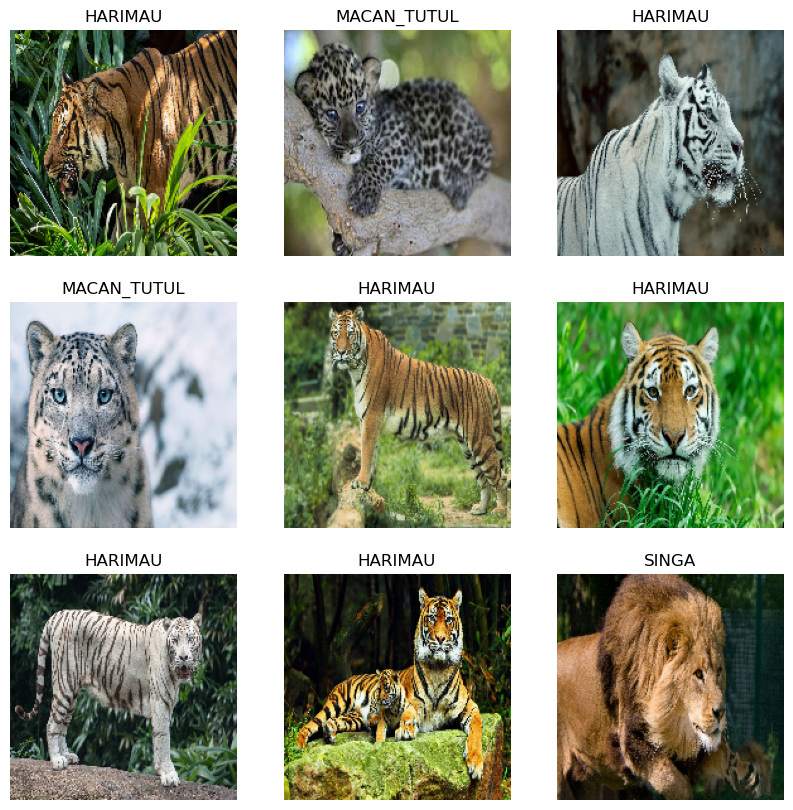

In [26]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(hewan_names[labels[i]])
        plt.axis('off')

In [27]:
AUTOTUNE = tf.data.AUTOTUNE

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [29]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [33]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input

# Ukuran gambar
img_size = 180

# Data augmentation dengan input shape
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Tentukan input shape di sini
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


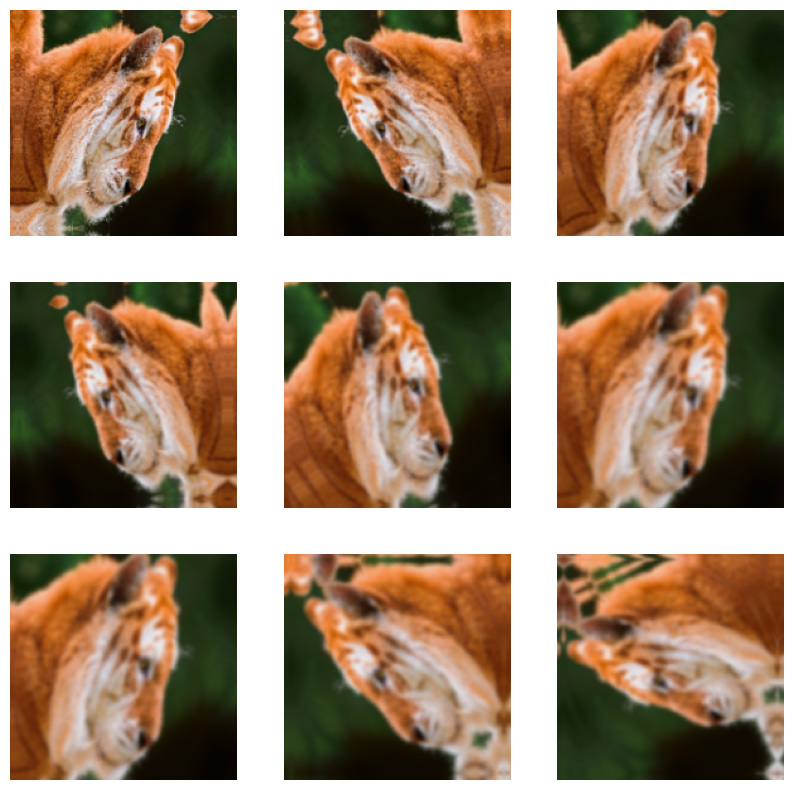

In [35]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [36]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.2979 - loss: 1.5380 - val_accuracy: 0.5192 - val_loss: 1.1143
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - accuracy: 0.4675 - loss: 1.0592 - val_accuracy: 0.5962 - val_loss: 1.0573
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.5506 - loss: 0.9494 - val_accuracy: 0.4808 - val_loss: 1.2165
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.5351 - loss: 0.9264 - val_accuracy: 0.5865 - val_loss: 0.9664
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.6586 - loss: 0.7861 - val_accuracy: 0.5000 - val_loss: 1.1085
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.7050 - loss: 0.7191 - val_accuracy: 0.5962 - val_loss: 1.0235
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.6336 - loss: 0.7877 - val_accuracy: 0.5000 - val_loss: 1.4271
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.7446 - loss: 0.5999 - val_accuracy: 0

In [40]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + hewan_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome.jpg

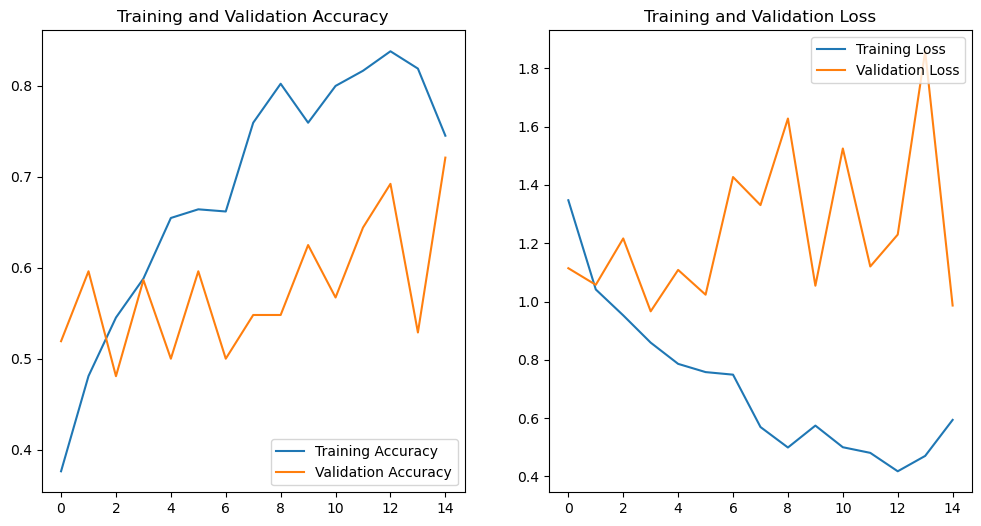

In [41]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan grafik akurasi dan loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Panggil fungsi setelah pelatihan selesai
plot_training_history(history)


In [43]:
model.save('hewan_Recog_Model.keras')

In [45]:
model = tf.keras.models.load_model('hewan_Recog_Model.keras')

C:\Users\ANISETUS B. MANALU\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
